In [58]:
import pymc as pm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import arviz as az

        Date        AMZN        AAPL        MSFT
0 2022-07-05  107.599998  137.770004  256.160004
1 2022-07-06  113.209999  141.350006  263.750000
2 2022-07-07  113.849998  143.289993  265.119995
3 2022-07-08  114.599998  145.259995  264.790009
4 2022-07-11  114.080002  145.669998  265.649994
5 2022-07-12  112.160004  145.759995  265.880005
6 2022-07-13  107.029999  142.990005  250.190002
7 2022-07-14  110.239998  144.080002  250.570007
8 2022-07-15  112.500000  149.779999  255.720001
9 2022-07-18  115.000000  150.740005  259.750000
Date    datetime64[ns]
AMZN           float64
AAPL           float64
MSFT           float64
dtype: object


<Axes: xlabel='Date'>

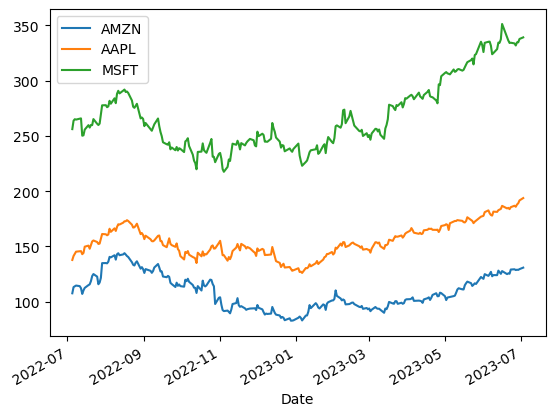

In [67]:
data = pd.read_csv("../../data/stocks.csv")

data["Date"] = pd.to_datetime(data["Date"])

print(data.head(10))
print(data.dtypes)

data.plot(x="Date")

In [97]:
returns = pd.DataFrame()
for col in data.columns:
    if col != 'Date':
        returns[col] = [data[col].iloc[i+1]/ data[col].iloc[i] for i in range(data.shape[0]-1)]

log_returns= returns.apply(np.log)


       AMZN      AAPL      MSFT
0  1.052138  1.025985  1.029630
1  1.005653  1.013725  1.005194
2  1.006588  1.013748  0.998755
3  0.995463  1.002823  1.003248
4  0.983170  1.000618  1.000866
       AMZN      AAPL      MSFT
0  0.050824  0.025653  0.029199
1  0.005637  0.013631  0.005181
2  0.006566  0.013655 -0.001245
3 -0.004548  0.002819  0.003243
4 -0.016974  0.000618  0.000865
        Date        AMZN        AAPL        MSFT
0 2022-07-05  107.599998  137.770004  256.160004
1 2022-07-06  113.209999  141.350006  263.750000
2 2022-07-07  113.849998  143.289993  265.119995
3 2022-07-08  114.599998  145.259995  264.790009
4 2022-07-11  114.080002  145.669998  265.649994


In [110]:
mu_hat = log_returns.mean()

mu_hat

AMZN    0.000782
AAPL    0.001365
MSFT    0.001123
dtype: float64

In [101]:
model = pm.Model()

with model:
    s, _, _ = pm.LKJCholeskyCov("s", eta=1,  n=3, sd_dist=pm.Lognormal.dist(np.zeros(3), np.ones(3), shape=3))
    mu = pm.MvNormal("mu", mu=mu_hat.to_numpy(), chol = s)

    R = pm.MvNormal("R", mu = mu, chol = s, observed=log_returns)

    p_data = pm.sample()



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, mu]


/home/james/miniconda3/envs/stats/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 367 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>]],
      dtype=object)

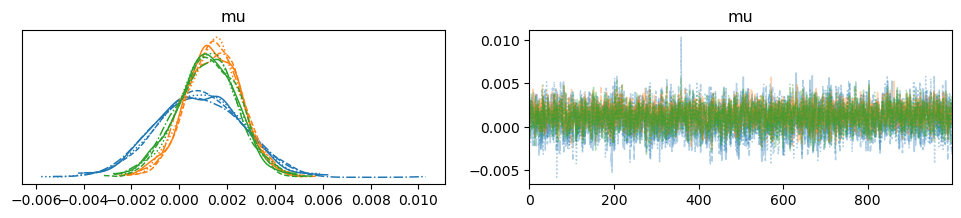

In [104]:
pm.plot_trace(p_data, var_names=['mu'])

array([[<Axes: title={'center': 's'}>, <Axes: title={'center': 's'}>]],
      dtype=object)

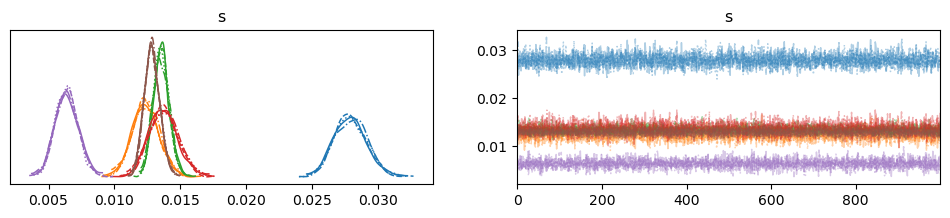

In [105]:
pm.plot_trace(p_data, var_names=['s'])

In [123]:
p_data.posterior.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 0.001142
    s        float64 0.01448
    s_corr   float64 0.792
    s_stds   float64 0.02209